In [1]:
import pandas as pd
import glob

In [2]:
graduation_rates = glob.glob('gr????.csv')
pell_graduation_rates = glob.glob('gr*_pell_ssl.csv')

graduation_rates_data = []
for file_name in graduation_rates:
    df = pd.read_csv(file_name)
    year = file_name[2:6]
    df['YEAR'] = int(year)
    graduation_rates_data.append(df)

pell_graduation_rates_data = []
for file_name in pell_graduation_rates:
    df = pd.read_csv(file_name)
    year = file_name[2:6]
    df['YEAR'] = int(year)
    pell_graduation_rates_data.append(df)

all_graduation_rates = pd.concat(graduation_rates_data)
all_pell_graduation_rates = pd.concat(pell_graduation_rates_data)

all_graduation_rates.to_csv('all_graduation_rates.csv')
all_pell_graduation_rates.to_csv('all_pell_graduation_rates.csv')


In [3]:
glob.glob('gr????.csv')

['gr2016.csv',
 'gr2017.csv',
 'gr2019.csv',
 'gr2018.csv',
 'gr2020.csv',
 'gr2021.csv',
 'gr2022.csv']

In [4]:
pell_outcomes_2022 = pd.read_csv('om2022.csv')
all_graduation_rates = pd.read_csv('all_graduation_rates.csv')
all_pell_graduation_rates = pd.read_csv('all_pell_graduation_rates.csv')
all_pell_graduation_rates['TTCMTOT'] = all_pell_graduation_rates['TTCMTOT ']
financial_aid_2022 = pd.read_csv('sfa2122.csv')

In [5]:
condition = all_graduation_rates['GRTYPE'].isin([2, 3, 12, 42])
all_graduation_rates = all_graduation_rates[condition]

In [6]:
all_graduation_rates['COHORT'].unique()

array([1, 2])

In [7]:

merged = pd.merge(all_graduation_rates, all_pell_graduation_rates, \
        left_on = ['UNITID', 'YEAR', 'COHORT'], right_on=['UNITID', 'YEAR', 'PSGRTYPE'])
merged_2 = pd.merge(pell_outcomes_2022, financial_aid_2022, on = 'UNITID')

In [8]:
a = merged[['UNITID', 'PGREVCT', 'COHORT', 'YEAR']]
a.shape, a.drop_duplicates().shape

# 360,535
#  49,254

((61855, 4), (30222, 4))

In [9]:
a = merged[['UNITID', 'GRTOTLT', 'COHORT', 'YEAR']]
a.shape, a.drop_duplicates().shape

# 360535, 297367

((61855, 4), (61293, 4))

In [10]:
a.groupby('UNITID').apply(lambda x: x[x['GRTOTLT']==x['GRTOTLT'].max()])

UNITID  GRTOTLT  COHORT  YEAR
UNITID                                     
100654 53206  100654     1404       1  2022
100663 53210  100663     1945       1  2022
100690 9270   100690       11       1  2017
100706 53217  100706     1193       1  2022
100724 18411  100724     1517       1  2019
...              ...      ...     ...   ...
497408 61844  497408        1       1  2022
       61845  497408        1       1  2022
       61846  497408        1       2  2022
498562 61847  498562     3163       1  2022
498571 61851  498571     2801       1  2022

[2920 rows x 4 columns]

In [11]:
merged[['UNITID', 'GRTOTLT', 'PGREVCT', 'COHORT', 'YEAR']]

,UNITID,GRTOTLT,PGREVCT,COHORT,YEAR
0,100654,1073,789,1,2016
1,100654,295,789,1,2016
2,100654,295,789,1,2016
3,100654,295,789,2,2016
4,100663,1537,681,1,2016
...,...,...,...,...,...
61850,498562,1637,1136,2,2022
61851,498571,2801,1278,1,2022
61852,498571,1348,1278,1,2022
61853,498571,733,1278,1,2022


In [12]:
merged_subset = merged[['UNITID', 'GRTOTLT', 'PGREVCT', 'COHORT', 'YEAR']]
merged_subset[(merged_subset['UNITID'] == 100654) & (merged_subset['YEAR'] == 2016)]

,UNITID,GRTOTLT,PGREVCT,COHORT,YEAR
0,100654,1073,789,1,2016
1,100654,295,789,1,2016
2,100654,295,789,1,2016
3,100654,295,789,2,2016


In [13]:
sum(merged['GRTOTLT'] > merged['PGREVCT'])/len(merged)

0.6105407808584593

In [14]:
# fouryear = merged[merged['COHORT']==2]

# x_axis = fouryear['YEAR'].unique()
# x_axis.sort()
# y_axis = fouryear.groupby('YEAR')['GRTOTLT'].mean()
# pell_grad = fouryear.groupby('YEAR')['PGREVCT'].mean()


In [15]:
x_axis = merged['YEAR'].unique()
x_axis.sort()
y_axis = merged.groupby('YEAR')['GRTOTLT'].mean()
pell_grad = merged.groupby('YEAR')['PGREVCT'].mean()

In [16]:
merged['COHORT'].unique()

array([1, 2])

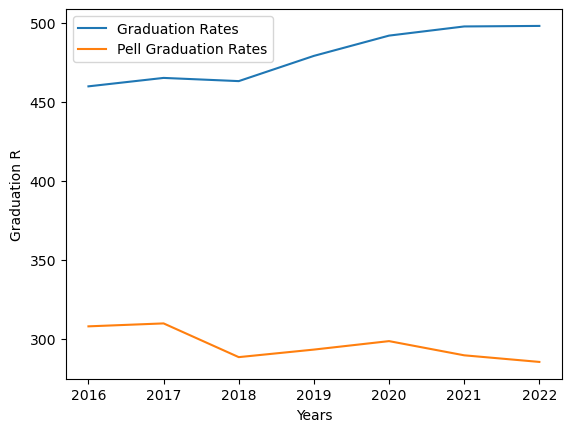

In [17]:
from matplotlib import pyplot as plt
plt.plot(x_axis, y_axis, label='Graduation Rates')
plt.plot(x_axis, pell_grad, label='Pell Graduation Rates')
plt.xlabel('Years')
plt.ylabel('Graduation R')
plt.legend()

In [18]:
merged.groupby(['YEAR','PSGRTYPE'])['PGREVCT'].sum() / merged.groupby(['YEAR','PSGRTYPE'])['GRTOTLT'].sum()

YEAR  PSGRTYPE
2016  1           0.680394
      2           0.627387
2017  1           0.680199
      2           0.611806
2018  1           0.637836
      2           0.568996
2019  1           0.628063
      2           0.555782
2020  1           0.624206
      2           0.546966
2021  1           0.597465
      2           0.528218
2022  1           0.589005
      2           0.518389
dtype: float64

In [19]:
merged['GRTYPE'].unique()

array([ 2,  3, 42, 12])

In [20]:
merged = pd.merge(all_graduation_rates, all_pell_graduation_rates, \
        left_on = ['UNITID', 'YEAR', 'COHORT'], right_on=['UNITID', 'YEAR', 'PSGRTYPE'])

In [21]:
# GRTYPE 2 (adjusted cohort)
condition = merged['GRTYPE'] == 2
adj_cohort = merged[condition]

# GRTYPE 3 (completers within 150% of normal time)
condition = merged['GRTYPE'] == 3
all_150 = merged[condition]

# GRTYPE 12 (bachelors completers within 150% of normal time)
condition = merged['GRTYPE'] == 12
bach_150 = merged[condition]

all_150

,Unnamed: 0_x,UNITID,GRTYPE,CHRTSTAT,SECTION,COHORT,LINE,XGRTOTLT,GRTOTLT,XGRTOTLM,...,TTEXCLU,XTTADJCT,TTADJCT,XTTCMBAC,TTCMBAC,XTTCMOBA,TTCMOBA,XTTCMTOT,TTCMTOT,TTCMTOT
1,1,100654,3,13,1,1,999,R,295,R,...,0,R,1073,R,295.0,R,0.0,R,295,295
5,16,100663,3,13,1,1,999,R,816,R,...,5,R,1537,R,813.0,R,3.0,R,816,816
9,37,100690,3,13,1,1,999,R,2,R,...,0,R,8,R,2.0,R,0.0,R,2,2
12,50,100706,3,13,1,1,999,R,292,R,...,0,R,600,R,292.0,R,0.0,R,292,292
16,65,100724,3,13,1,1,999,R,236,R,...,0,R,1090,R,236.0,R,0.0,R,236,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61839,48064,496399,3,13,1,1,999,R,8,R,...,0,R,8,R,0.0,R,8.0,R,8,8
61841,48070,496627,3,13,1,1,999,R,19,R,...,0,R,25,R,19.0,R,0.0,R,19,19
61845,48088,497408,3,13,1,1,999,R,1,Z,...,0,R,1,R,1.0,R,0.0,R,1,1
61848,48102,498562,3,13,1,1,999,R,1694,R,...,0,R,3163,R,1676.0,R,18.0,R,1694,1694


In [22]:
adj_cohort = adj_cohort[['YEAR', 'GRTOTLT', 'PGADJCT']]
all_150 = all_150[['YEAR', 'GRTOTLT', 'PGCMTOT']]
bach_150 = bach_150[['YEAR', 'GRTOTLT', 'PGCMBAC']]

In [23]:
adj_cohort

,YEAR,GRTOTLT,PGADJCT
0,2016,1073,789
4,2016,1537,678
8,2016,8,6
11,2016,600,201
15,2016,1090,934
...,...,...,...
61838,2022,8,0
61840,2022,25,0
61844,2022,1,0
61847,2022,3163,1229


In [24]:
adj_cohort['pell_percent'] = adj_cohort['PGADJCT']/adj_cohort['GRTOTLT']
all_150['pell_percent'] = all_150['PGCMTOT']/all_150['GRTOTLT']
bach_150['pell_percent'] = bach_150['PGCMBAC']/bach_150['GRTOTLT']

/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_8649/2989519640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_150['pell_percent'] = all_150['PGCMTOT']/all_150['GRTOTLT']


In [25]:
x_axis = adj_cohort['YEAR'].unique()
x_axis.sort()
adj_cohort_y = adj_cohort.groupby('YEAR')['pell_percent'].mean()

all_150_y = all_150.groupby('YEAR')['pell_percent'].mean()

bach_150_y = bach_150.groupby('YEAR')['pell_percent'].mean()


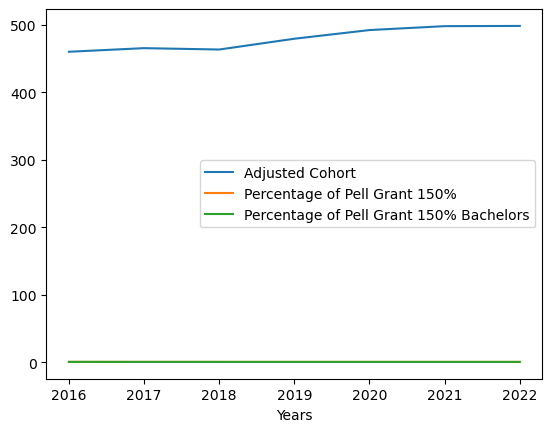

In [26]:
from matplotlib import pyplot as plt
plt.plot(x_axis, y_axis, label='Adjusted Cohort') # The percentage of pell recipients
plt.plot(x_axis, all_150_y, label='Percentage of Pell Grant 150%')
plt.plot(x_axis, bach_150_y, label='Percentage of Pell Grant 150% Bachelors')
plt.xlabel('Years')
#plt.ylabel('Graduation R')
plt.legend()

In [27]:
pell = all_pell_graduation_rates[['YEAR', 'PSGRTYPE', 'PGCMTOT', 'PGADJCT', 
                                  'TTCMTOT', 'TTADJCT']]
pell = pell[pell['PSGRTYPE'] == 1] # all degree-seekers at 4-year institutions

In [28]:
pell['PELL_GRAD_RATE'] = pell['PGCMTOT'] / pell['PGADJCT']
pell['GRAD_RATE'] = pell['TTCMTOT'] / pell['TTADJCT']
pell = pell.dropna()
pell

,YEAR,PSGRTYPE,PGCMTOT,PGADJCT,TTCMTOT,TTADJCT,PELL_GRAD_RATE,GRAD_RATE
0,2016,1,200,789,295,1073,0.253485,0.274930
2,2016,1,339,678,816,1537,0.500000,0.530904
5,2016,1,1,6,2,8,0.166667,0.250000
8,2016,1,79,201,292,600,0.393035,0.486667
10,2016,1,199,934,236,1090,0.213062,0.216514
...,...,...,...,...,...,...,...,...
60774,2018,1,0,1,0,1,0.000000,0.000000
60776,2018,1,203,667,554,1501,0.304348,0.369087
60779,2018,1,2,2,3,6,1.000000,0.500000
60827,2018,1,22,105,24,127,0.209524,0.188976


In [29]:
x_axis = pell['YEAR'].unique()
x_axis.sort()
pell_y = pell.groupby('YEAR')['PELL_GRAD_RATE'].mean()
everyone_y = pell.groupby('YEAR')['GRAD_RATE'].mean()

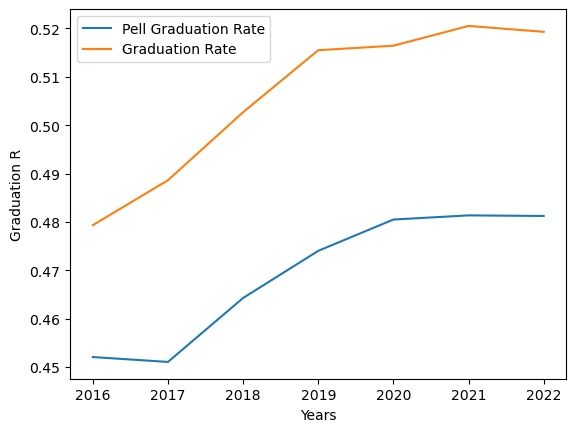

In [30]:
from matplotlib import pyplot as plt
plt.plot(x_axis, pell_y, label='Pell Graduation Rate')
plt.plot(x_axis, everyone_y, label='Graduation Rate')
plt.xlabel('Years')
plt.ylabel('Graduation R')
plt.legend()

In [31]:
pell_by_psgrtype = all_pell_graduation_rates[['YEAR', 'PSGRTYPE', 'PGCMTOT', 'PGADJCT', 
                                  'TTCMTOT', 'TTADJCT']]

# #total_cohort = (pell_by_psgrtype['PSGRTYPE'] == 1)
# all_pell_graduation_rates['total_cohort'] = pell_by_psgrtype['PSGRTYPE'] = 1

# #bach_cohort = (pell_by_psgrtype['PSGRTYPE'] == 2)
# all_pell_graduation_rates['bach_cohort'] = pell_by_psgrtype['PSGRTYPE'] = 2

# #other_cohort = (pell_by_psgrtype['PSGRTYPE'] == 3)
# all_pell_graduation_rates['other_cohort'] = pell_by_psgrtype['PSGRTYPE'] = 3

# #other_cohort_less = (pell_by_psgrtype['PSGRTYPE'] == 4)
# all_pell_graduation_rates['other_cohort_less'] = pell_by_psgrtype['PSGRTYPE'] = 4




In [32]:
pell_by_psgrtype['pell_rates'] = pell_by_psgrtype['PGCMTOT'] / pell_by_psgrtype['PGADJCT']
pell_by_psgrtype.dropna(inplace=True)

/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_8649/1982141131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pell_by_psgrtype['pell_rates'] = pell_by_psgrtype['PGCMTOT'] / pell_by_psgrtype['PGADJCT']
/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_8649/1982141131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pell_by_psgrtype.dropna(inplace=True)


In [33]:
pell_groups = pell_by_psgrtype.groupby(['YEAR', 'PSGRTYPE'], as_index=False)['pell_rates'].mean()
pell_groups

,YEAR,PSGRTYPE,pell_rates
0,2016,1,0.452049
1,2016,2,0.459634
2,2016,3,0.384543
3,2016,4,inf
4,2017,1,0.451042
5,2017,2,0.461667
6,2017,3,0.358408
7,2017,4,0.567008
8,2018,1,0.464270
9,2018,2,0.473483


In [34]:
x_axis = pell_groups['YEAR'].unique()
x_axis.sort()
psgrtype_1 = pell_groups[pell_groups['PSGRTYPE'] == 1]['pell_rates']
psgrtype_2 = pell_groups[pell_groups['PSGRTYPE'] == 2]['pell_rates']
psgrtype_3 = pell_groups[pell_groups['PSGRTYPE'] == 3]['pell_rates']
psgrtype_4 = pell_groups[pell_groups['PSGRTYPE'] == 4]['pell_rates']

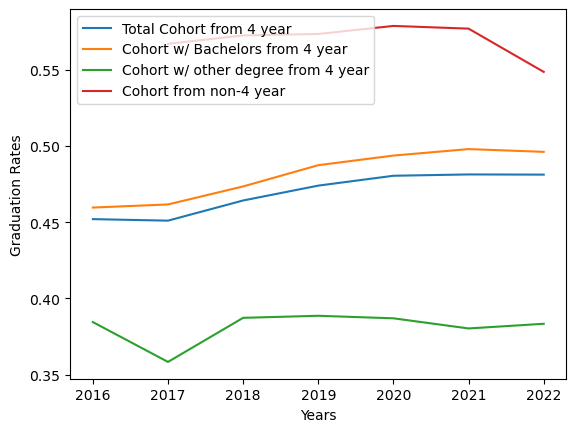

In [35]:
from matplotlib import pyplot as plt
plt.plot(x_axis, psgrtype_1, label='Total Cohort from 4 year')
plt.plot(x_axis, psgrtype_2, label='Cohort w/ Bachelors from 4 year')
plt.plot(x_axis, psgrtype_3, label='Cohort w/ other degree from 4 year')
plt.plot(x_axis, psgrtype_4, label='Cohort from non-4 year')
plt.xlabel('Years')
plt.ylabel('Graduation Rates')
plt.legend()